# <p style="text-align:center;text-decoration:underline">Homework-2</p>

### - Libraries and Utility Functions
* Import necessary libraries needed for the data processing and visualization.
<br>
* Following python packages have been used:- **pandas,numpy,wordcloud,matplotlib,gmplot.**
<br>
* Utilities consists of the reusable routines like functions to read read csv file, plot histograms, heatmaps etc.

In [0]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
from datetime import datetime
import gmplot as gp

In [0]:
def readFile(file):
    try:
        return pd.read_csv(file,header=None).values
    except:
        print("Error reading file "+file)
        return None

In [0]:
data=readFile("baltimore_crimes.csv")
#creating attribute index from header
attrDict={ attr:index for index,attr in enumerate(data[0])}
data=data[1:] #remaining data without header

In [0]:
def barPlot(x,y,xlabel,ylabel,title):
    plt.figure(3,figsize=(10,5))
    plt.bar(x,y)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.xticks(x, fontsize=10, rotation=90)
    plt.title(title,fontsize=15)
    plt.show()

In [0]:
#plot the histogram of an attribute vs its frequency
def crimeFreq(attr):
    x=data[:,attrDict[attr]]
    x=np.unique(x,return_counts=True)
    y=x[1]
    x=x[0]
    if attr=="District":
        print("===============================================================")
        print("District with most and least number of crime incidents: ")
        print("===============================================================")
        print("%s | %s"%(x[np.argmax(y)],y[np.argmax(y)]))
        print("%s | %s"%(x[np.argmin(y)],y[np.argmin(y)]))
        print("===============================================================")
    else:
        attr="Crime Type"
        print("===============================================================")
        print("Most Common Crime: ")
        print("===============================================================")
        print("%s | %s"%(x[np.argmax(y)],y[np.argmax(y)]))
#         print("%s | %s"%(x[np.argmin(y)],y[np.argmin(y)]))
        print("===============================================================")
    barPlot(x,y,attr,"Crime Frequency","Crime Frequency vs " +attr+ " of baltimore")

In [0]:
def heatMap(locations,filename):
    print("Check the file %s"%(filename))
    locations=[eval(x) for x in locations]
    locations=list(zip(*locations))
    heat_lats=list(locations[0])
    heat_lngs=list(locations[1])
    gmap=gp.GoogleMapPlotter(39.2904, -76.6122, 16)#baltimore cordinates
    gmap.heatmap(heat_lats, heat_lngs)
    gmap.draw(filename)

<hr>

## <p style="padding: 10px;background:yellow;text-decoration:underline;text-align:center">Part 1</p>

### 1. Frequency of crime incidents across all districts.

District with most and least number of crime incidents: 
SOUTHEASTERN | 2828
NORTHEASTERN | 51


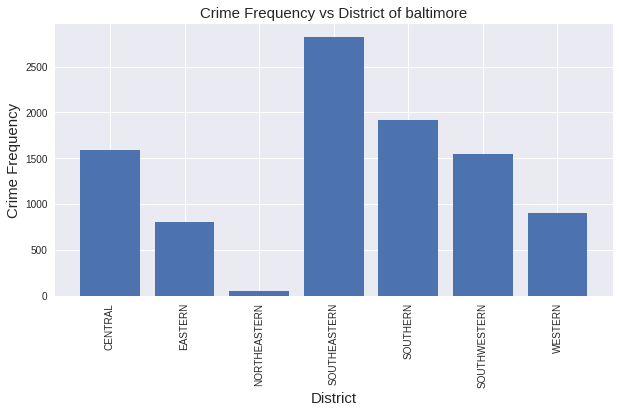

In [7]:
crimeFreq("District")

<hr>

### 2. Heatmap of the crimes committed and analysis

As per the heat map generated, crimes are not evenly distributed.
<br>
Most of the attacks takes place in **South eastern district**.
<br>
There are some of the spots where the frequency of crime incidents are large as compared to other areas.
<br>
Some of the spots are:

* near, **Horseshow Casino**
* near, **Our daily bread employment center or Walter's art museum**
* near, **TD Bank**
* near, **King architechtural metals**

In [8]:
heatMap(data[:,attrDict["Location 1"]],"All-Crimes.html")

Check the file All-Crimes.html


### 3. Frequency of crime vs day of the week and vs time of day.

Day with most number of crime incidents: 
Tuesday | 1459


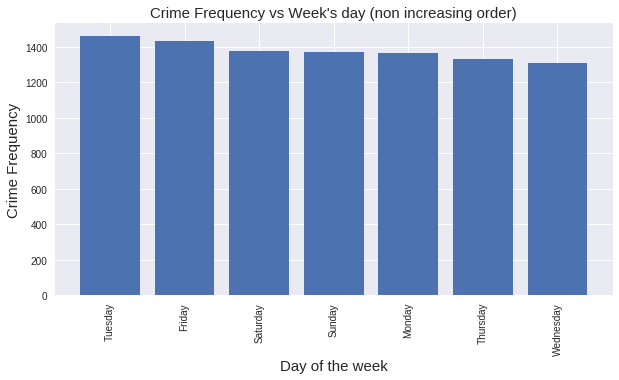

Time with most number of crime incidents: 
18-19 | 605


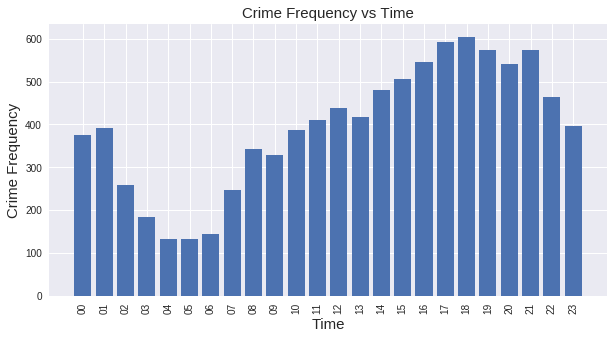

Crime which occured mostly in between 20:00 - 23:59: 
LARCENY FROM AUTO | 358


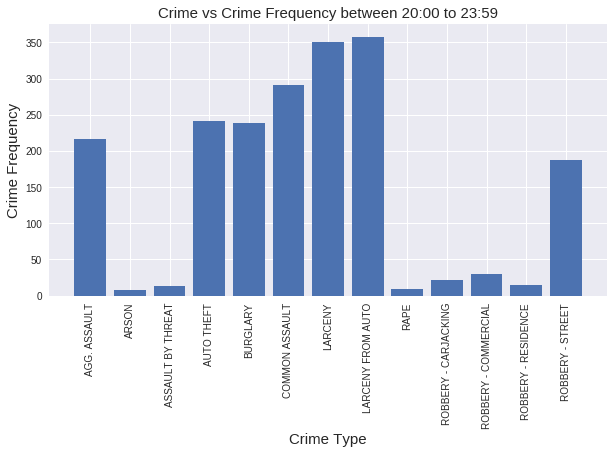

In [10]:
def dayTimeCrime():
    
    #first - bar graph- week day vs crime frequency in non-increasing order of crime frequency
    x=data[:,attrDict["CrimeDate"]]
    x=[datetime.strptime(date, '%m/%d/%Y').strftime('%A') for date in x]
    x=np.unique(x,return_counts=True)
    y=x[1]
    x=x[0]
    orderedFreqVsDay=sorted({y:x for x,y in zip(x,y)}.items(),reverse=True)
    print("===========================================")
    print("Day with most number of crime incidents: ")
    print("===========================================")
    print("%s | %s"%(x[np.argmax(y)],y[np.argmax(y)]))
    print("===========================================")
    listTuples=(list(zip(*orderedFreqVsDay)))
    barPlot(list(listTuples[1]),list(listTuples[0]),"Day of the week","Crime Frequency","Crime Frequency vs Week's day (non increasing order)")
    
    
    #second - bar graph time vs crime frequency
    x=data[:,attrDict["CrimeTime"]]
    xtemp=[]
    crimeCode=data[:,attrDict["Description"]]
    ccBetween202359=[]
    for date,cc in zip(x,crimeCode) :
        index=date.find(":")
        if index!=-1:
            hr=date[:index]
            xtemp.append(hr)
            if int(hr)>=20 and int(hr):
                ccBetween202359.append(cc)  
    x=np.unique(xtemp,return_counts=True)
    y=x[1]
    x=x[0]
    
    ccBetween202359=np.unique(ccBetween202359,return_counts=True)
#     print(ccBetween202359)
    print("===========================================")
    print("Time with most number of crime incidents: ")
    print("===========================================")
    print("%s-%d | %s"%(x[np.argmax(y)],(int(x[np.argmax(y)])+1)%24,y[np.argmax(y)]))
    print("===========================================")
    barPlot(x,y,"Time","Crime Frequency","Crime Frequency vs Time")
    print("===========================================")
    print("Crime which occured mostly in between 20:00 - 23:59: ")
    print("===========================================")
    print("%s | %s"%(ccBetween202359[0][np.argmax(ccBetween202359[1])],ccBetween202359[1][np.argmax(ccBetween202359[1])]))
    print("===========================================")
    barPlot(ccBetween202359[0],ccBetween202359[1],"Crime Type","Crime Frequency","Crime vs Crime Frequency between 20:00 to 23:59")
dayTimeCrime()

### 4. Frequency vs crime plot

Most Common Crime: 
LARCENY | 2153


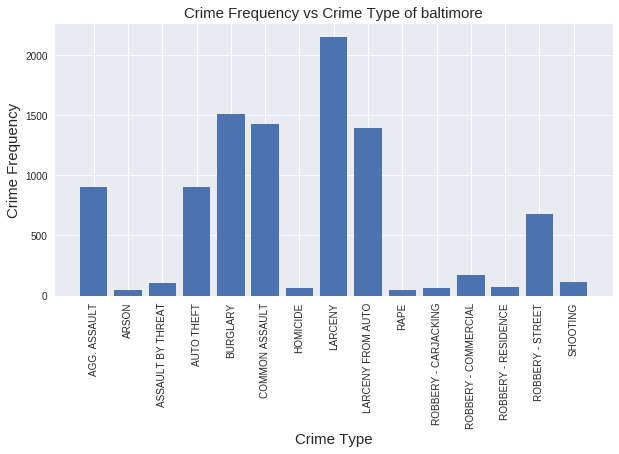

Time when most number of LARCENY incidents occured: 
16:00-17:00 | 160


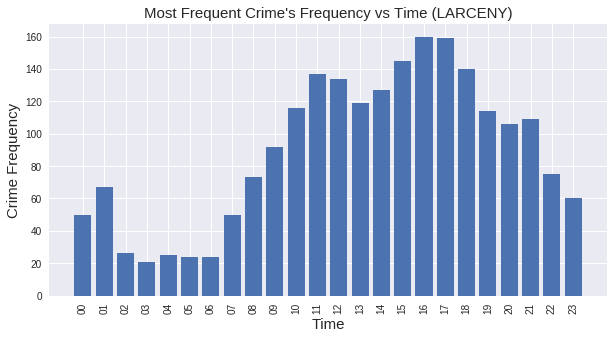

For heat map of most frequent crime in city : (LARCENY)
Check the file Most-Popular-Crime.html


In [11]:
def subpart4():
    #first Graph
    crimeFreq("Description")
    
    #second- bar graph most frequent crime and its time distribution
    crimes=data[:,attrDict["Description"]]
    uniqueCrimes,counts=np.unique(crimes,return_counts=True)
    mostFCrime=uniqueCrimes[np.argmax(counts)]
    hrs=[ hr[:hr.find(":")] for hr in data[np.where(crimes==mostFCrime),attrDict["CrimeTime"]][0] if ":" in hr]
    latlongs=[latlong for latlong in data[np.where(crimes==mostFCrime),attrDict["Location 1"]][0]]
    uniqueHrs,counts=np.unique(hrs,return_counts=True)
    
    print("==============================================================")
    print("Time when most number of %s incidents occured: "%(mostFCrime))
    print("==============================================================")
    print("%s:00-%s:00 | %s"%(uniqueHrs[np.argmax(counts)],str(int(uniqueHrs[np.argmax(counts)])+1),counts[np.argmax(counts)]))
    print("==============================================================")
    barPlot(uniqueHrs,counts,"Time","Crime Frequency","Most Frequent Crime's Frequency vs Time "+"("+mostFCrime+")")
    
    #third - heatmap of most popular crime (larceny)
    print("==============================================================")
    print("For heat map of most frequent crime in city : "+"("+mostFCrime+")")
    heatMap(latlongs,"Most-Popular-Crime.html")
    
subpart4()

As per the heat map generated, crimes are not evenly distributed.
<br>
Most of the attacks takes place in **South eastern district**.
<br>
There are some of the spots where the frequency of crime incidents are large as compared to other areas.
<br>
Some of the spots are:

* near, **TD Bank Road**
* near, **King architechtural metals and royal farm**
* near, **Horseshow casino**

## <p style="padding: 10px;background:yellow;text-decoration:underline;text-align:center">Part 2</p>

### 1. Histogram of frequency of terrorist attacks in North America vs decade.
### 2. Frequency of terrorist attacks from 1970 to 2017 (across globe).
### 3. Word clouds for the summary and motive for all the terrorist attacks.
### 4. Strongly connected components of cordinated attacks.

In [12]:
data=pd.read_excel("global_terrorism_database.xlsx",parse_cols="A,B,K,S,BM,EE")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  """Entry point for launching an IPython kernel.


In [0]:
stopWords=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't","claim","claimed","however","Responsibility"]

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
def drawNetwork(relations):
    G=nx.Graph()
    G.add_edges_from(relations)
    Gc = max(nx.connected_component_subgraphs(G), key=len)
    plt.figure(10,figsize=(20,20))
    print("===========================================")
    print("Total number of Connected Components : ",nx.number_connected_components(G))
    print("Largest coordinated terror attack contains ",len(Gc.nodes())," number of attacks")
    print("===========================================")
    nx.draw_networkx(Gc,node_size=200,with_labels=True,node_color="skyblue")
    plt.show()

Decade with most number of terrorist attacks in North America: 
1970 | 1596


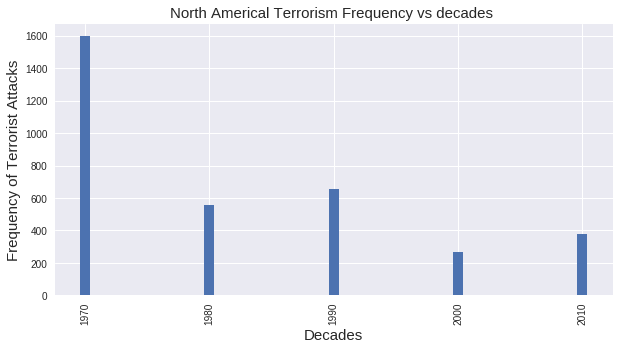

Year in which most attack takes place: 2014 (across globe): 


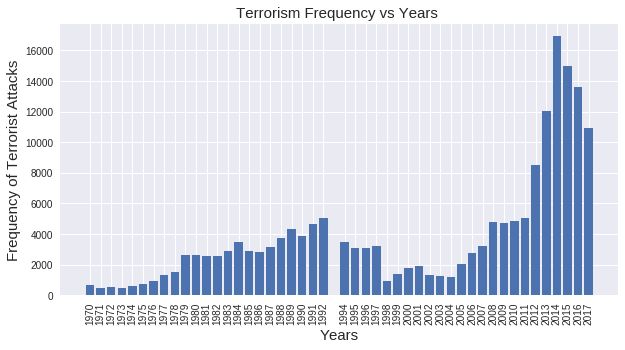

Continent which experienced most number of attacks in year: 
Middle East & North Africa | 6939


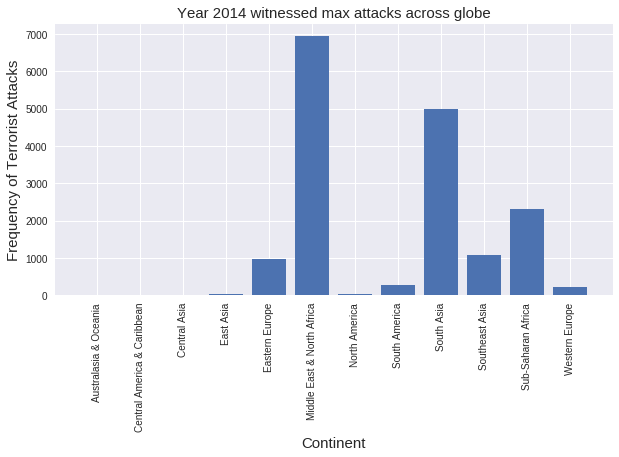

Word Cloud for SUMMARY: 
Most popular reasons and descriptions for attacks are: 
Explosive, device, blasts, opened fire, police officer, killed, injured, islamic state, suicide.


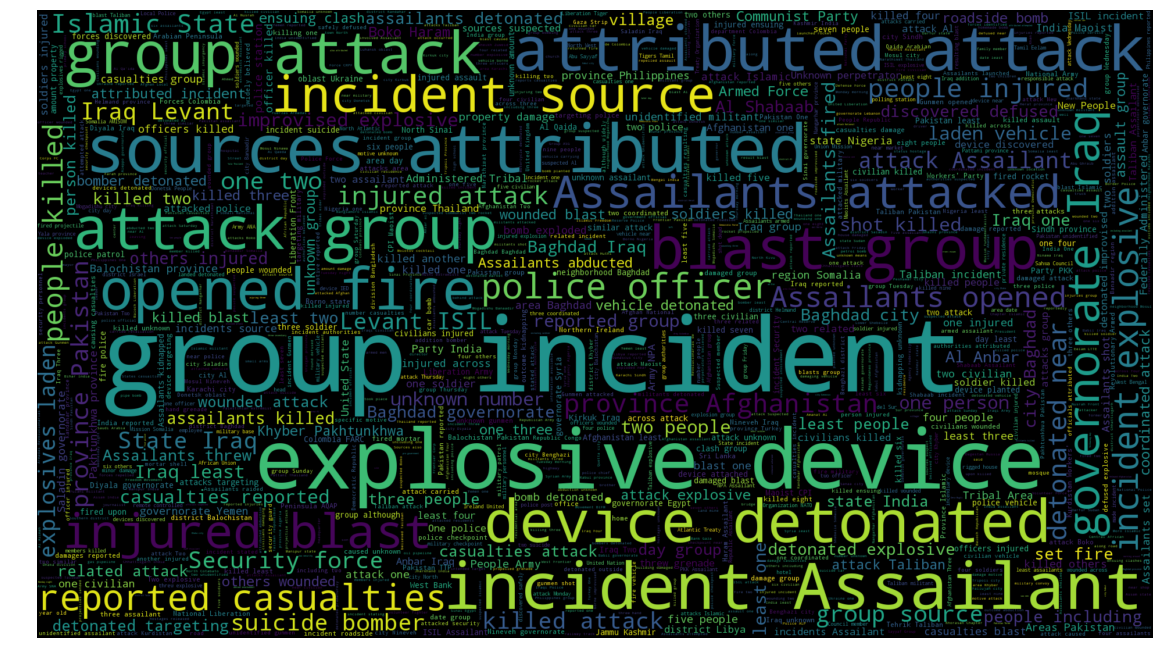

Word Cloud for MOTIVE: 
Most popular reasons and descriptions for attacks are: 
Unknown,attack,speculated attack, violance


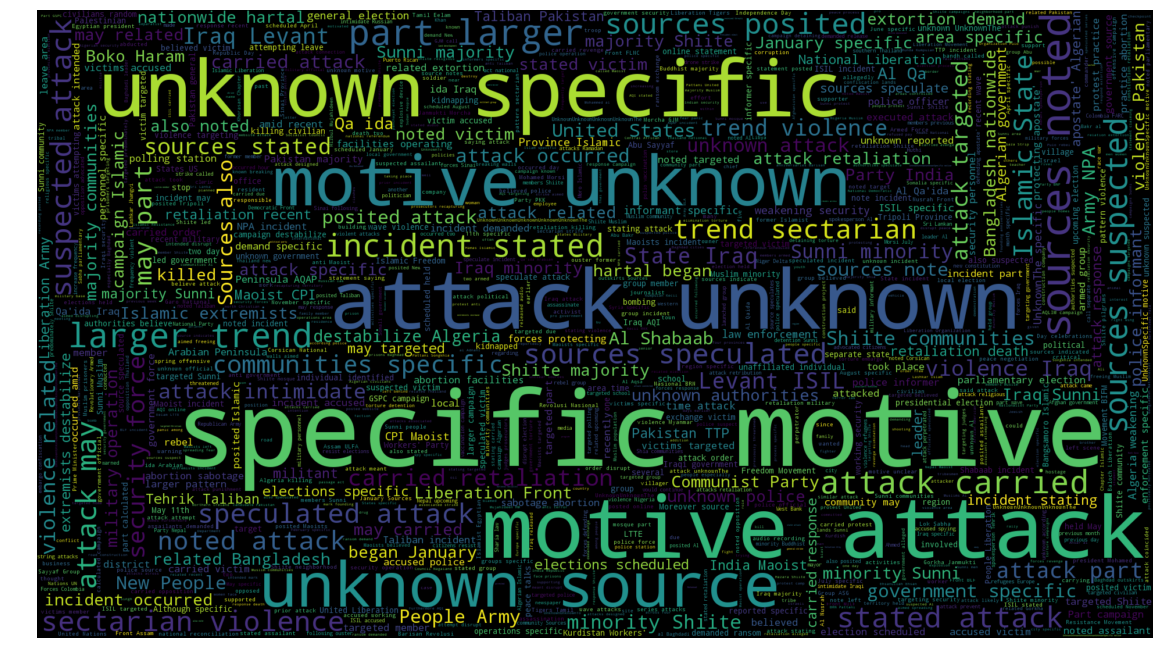

Network graph of cordinated attacks
Total number of Connected Components :  7335
Largest coordinated terror attack contains  80  number of attacks


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


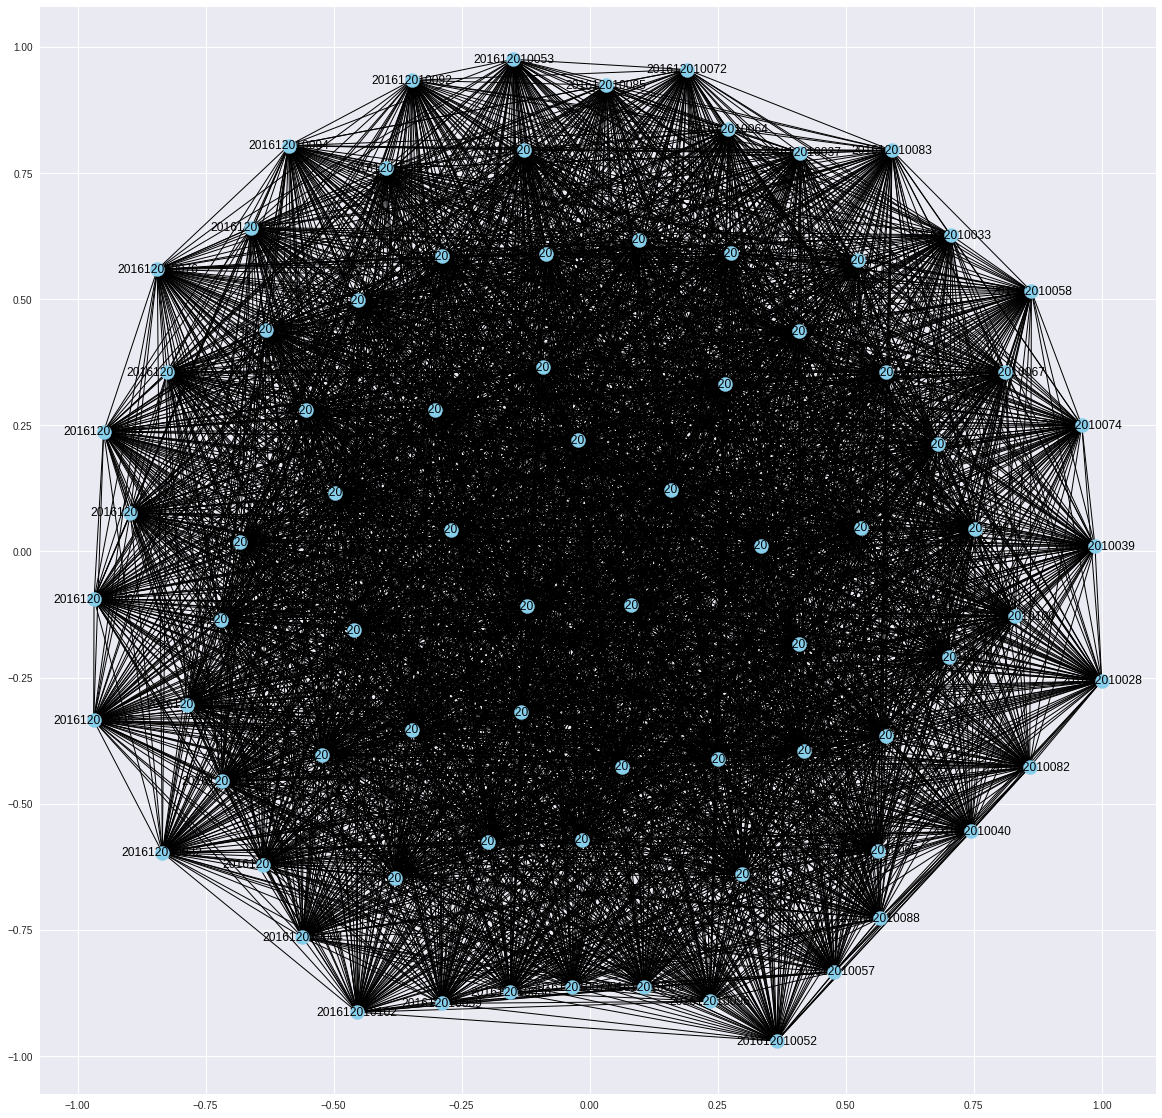

In [31]:
from PIL import Image
def part1And2():
    ids=data["eventid"].values
    years=data["iyear"].values
    conti=data["region_txt"].values
    summary=data["summary"].values
    motive=data["motive"].values
    relatedTo=data["related"].values
#     print(len(ids))
    wordsSummary=""
    wordsMotive=""
    contiVsYear={}
    yearVsConti={}
    yearsCount={}
    NAdecades=[]
    relations=[]
    count=0
    smmWords=""
    mtWords=""
    for key,val,smm,mt,rel,eid  in zip(conti,years,summary,motive,relatedTo,ids):
        ######## third part remove stop words ##########
        smm=str(smm)
        mt=str(mt)
        rel=str(rel)
        if smm!="nan":
            smmWords+=smm[smm.find(":")+2:]
        if mt!="nan":
            mtWords+=mt
        if rel!="nan":
            tempp=rel.split(", ")
            for relid in tempp:
                relations.append((str(eid),relid))
        
        ################### first and second part ###############
        if key=="North America":
            NAdecades.append(val-(val%10))
        yearVsConti.setdefault(val, []).append(key)
        contiVsYear.setdefault(key, []).append(val)
    yearAttrackCount=[len(val) for val in yearVsConti.values()]
    maxAttackYear=list(yearVsConti.keys())[np.argmax(yearAttrackCount)]
    mxYrConti,mxYearCount=np.unique(yearVsConti[maxAttackYear],return_counts=True)
#     ########################## 1st subpart ###############################
    NADecadesUnique,NAcounts=np.unique(NAdecades,return_counts=True)
    print("=========================================================================")
    print("Decade with most number of terrorist attacks in North America: ")
    print("=========================================================================")
    print("%s | %s"%(NADecadesUnique[np.argmax(NAcounts)],NAcounts[np.argmax(NAcounts)]))
    print("===========================================")
    barPlot(NADecadesUnique,NAcounts,"Decades","Frequency of Terrorist Attacks","North Americal Terrorism Frequency vs decades ")
    
    ########################## 2nd subpart ###############################
    print("=====================================================================")
    print("Year in which most attack takes place: %s (across globe): "%(maxAttackYear))
    print("=====================================================================")
    barPlot(list(yearVsConti.keys()),yearAttrackCount,"Years","Frequency of Terrorist Attacks","Terrorism Frequency vs Years ")
    print("=====================================================================")
    print("Continent which experienced most number of attacks in year: "%(maxAttackYear))
    print("=====================================================================")
    print("%s | %s"%(mxYrConti[np.argmax(mxYearCount)],mxYearCount[np.argmax(mxYearCount)]))
    print("=====================================================================")
    barPlot(mxYrConti,mxYearCount,"Continent","Frequency of Terrorist Attacks","Year %s witnessed max attacks across globe"%(maxAttackYear))
    
    
    ########################## 3rd subpart ###############################
    terror_mask = np.array(Image.open("rab.jpg"))
    wordcloudSummary = WordCloud(mask=terror_mask,max_words=1000,stopwords=stopWords).generate(smmWords)   
    plt.figure(3,figsize=(20,20))
    plt.imshow(wordcloudSummary, interpolation="bilinear") 
    plt.axis("off") 
    plt.margins(x=0, y=0) 
    print("===========================================")
    print("Word Cloud for SUMMARY: ")
    print("===========================================")
    print("Most popular reasons and descriptions for attacks are: ")
    print("Explosive, device, blasts, opened fire, police officer, killed, injured, islamic state, suicide.")
    plt.show() 
  
    
    wordcloudMotive = WordCloud(mask=terror_mask,max_words=1000,stopwords=stopWords).generate(mtWords)   
    plt.figure(3,figsize=(20,20))
    plt.imshow(wordcloudMotive, interpolation="bilinear") 
    plt.axis("off") 
    plt.margins(x=0, y=0) 
    print("===========================================")
    print("Word Cloud for MOTIVE: ")
    print("Most popular reasons and descriptions for attacks are: ")
    print("Unknown,attack,speculated attack, violance")
    print("===========================================")
    plt.show() 
    print("===========================================")
    print("Network graph of cordinated attacks")
    print("===========================================")
    drawNetwork(relations)
part1And2()

